# Centrality Analysis

**Bridge Analysis**
- Type 1: Bridges that have followers from both communities
  -  Betweeness Centrality :   

- Type 2: Bridges that have followers only from one communities, and follow one or more bridges itself.
  -  Betweeness Centrality : How critical is the node in spreading information into the community where all its followers are from.
  -  Closeness Centrality : How efficient it is for information to spread from this user/node.

**Community Analysis**
- Closeness Centrality : lower the closeness indicates the more important the node is within its echo chamber. 

In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
sys.path.insert(0, '/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset')
import header as head

centrality_path = "/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality"

## Graph Construction

Edge Represent following relations

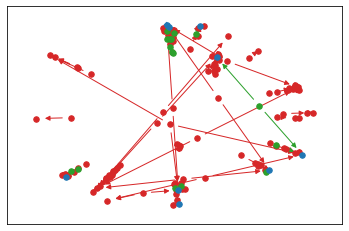

In [68]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

G = nx.DiGraph()

G.add_nodes_from(communities["rumours"])
rumourEdges = []
rumourNodes = []

G.add_nodes_from(communities["non_rumours"])
non_rumourEdges = []
non_rumourNodes = []

G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = []

for id in followed_by:
    user = followed_by[id]

    for follower in user["rumours"]: 
        rumourEdges.append((follower,id))
        G.add_edges_from(rumourEdges)

    for follower in user["non_rumours"]: 
        non_rumourEdges.append((follower,id))
        G.add_edges_from(non_rumourEdges)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        G.add_edges_from(bridgeEdges)

isolates = set(list(nx.isolates(G)))
communities["rumours"] = list(set(communities["rumours"]).difference(isolates))
communities["non_rumours"] = list(set(communities["non_rumours"]).difference(isolates))
communities["bridges"] = list(set(communities["bridges"]).difference(isolates))
# print(len(communities["rumours"]))
# print(len(communities["non_rumours"]))
# print(len(communities["bridges"]))
# print(isolates)
# print(len(isolates))

pos = nx.spring_layout(G)
# pos = nx.planar_layout(G)
node_size = 30
nx.draw_networkx_nodes(G, pos, nodelist=communities["rumours"], node_size=node_size, node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=communities["non_rumours"], node_size=node_size, node_color="tab:green")
nx.draw_networkx_nodes(G, pos, nodelist=communities["bridges"], node_size=node_size, node_color="tab:blue")

nx.draw_networkx_edges(
            G,
            pos,
            edgelist=rumourEdges,
            edge_color="tab:red"
        )
nx.draw_networkx_edges(
            G,
            pos,
            edgelist=non_rumourEdges,
            edge_color="tab:green"
        )
nx.draw_networkx_edges(
            G,
            pos,
            edgelist=bridgeEdges,
            edge_color="tab:blue"
        )


plt.show()
